In [6]:
import json
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
sample_10k = pd.read_csv('/shared/3/projects/bangzhao/prosodic_embeddings/sample/sampleProsodicFeature10k_cleaned_sample10kchunk.csv')
sample_10k = sample_10k[['content', 'mfcc1_sma3', 'mfcc2_sma3', 'mfcc3_sma3', 'mfcc4_sma3', 
           'F0semitoneFrom27.5Hz_sma3nz', 'F1frequency_sma3nz']].dropna()

In [3]:
sample_10k

,content,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,F0semitoneFrom27.5Hz_sma3nz,F1frequency_sma3nz
0,stay,25.371308,8.978687,11.964791,-6.018027,21.042704,552.845189
1,strong,17.737749,8.586741,-18.301827,-8.409399,15.658518,554.085501
2,out,-21.588401,31.288667,-7.893286,3.554673,8.707195,660.216277
3,there,7.906968,15.130100,-0.474800,-7.289108,22.749812,669.331369
4,.,29.632018,11.655817,-5.636016,-8.897525,15.986924,754.552002
...,...,...,...,...,...,...,...
5119995,got,44.637697,13.476027,17.174530,23.486642,21.177602,446.887096
5119996,",",32.893096,11.895174,13.960909,21.185836,0.000000,509.947634
5119997,you,21.795304,0.161717,6.910892,17.092371,4.314719,510.279217
5119998,know,38.867386,11.762248,11.942741,22.211916,27.792478,428.901432


In [4]:
know = sample_10k[sample_10k['content']==' know']

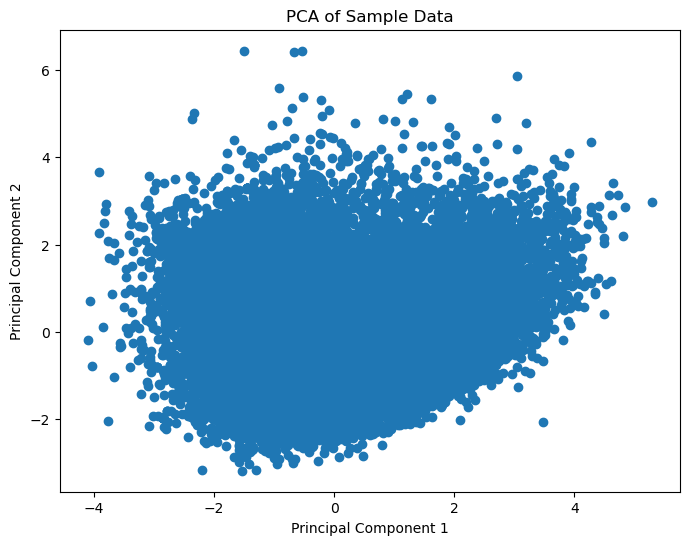

In [7]:
# Standardize the features
features = ['mfcc1_sma3', 'mfcc2_sma3', 'mfcc3_sma3', 'mfcc4_sma3', 
            'F0semitoneFrom27.5Hz_sma3nz', 'F1frequency_sma3nz']
x = know[features].values
x = StandardScaler().fit_transform(x)

# Apply PCA
pca = PCA(n_components=2)  # You can choose the number of components you want
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate with the original content column
final_df = pd.concat([know[['content']].reset_index(drop=True), principal_df], axis=1)

# Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(final_df['Principal Component 1'], final_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Sample Data')
plt.show()